# 1. Read the dataset to python environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_excel(r"C:\Users\paryn\Downloads\iris (1).xls")

Checking basic details of the data set

In [3]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 5)

# 2. Do the necessary pre-processing steps

Checking for null values

In [5]:
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Checking the distribution of numerical data points.

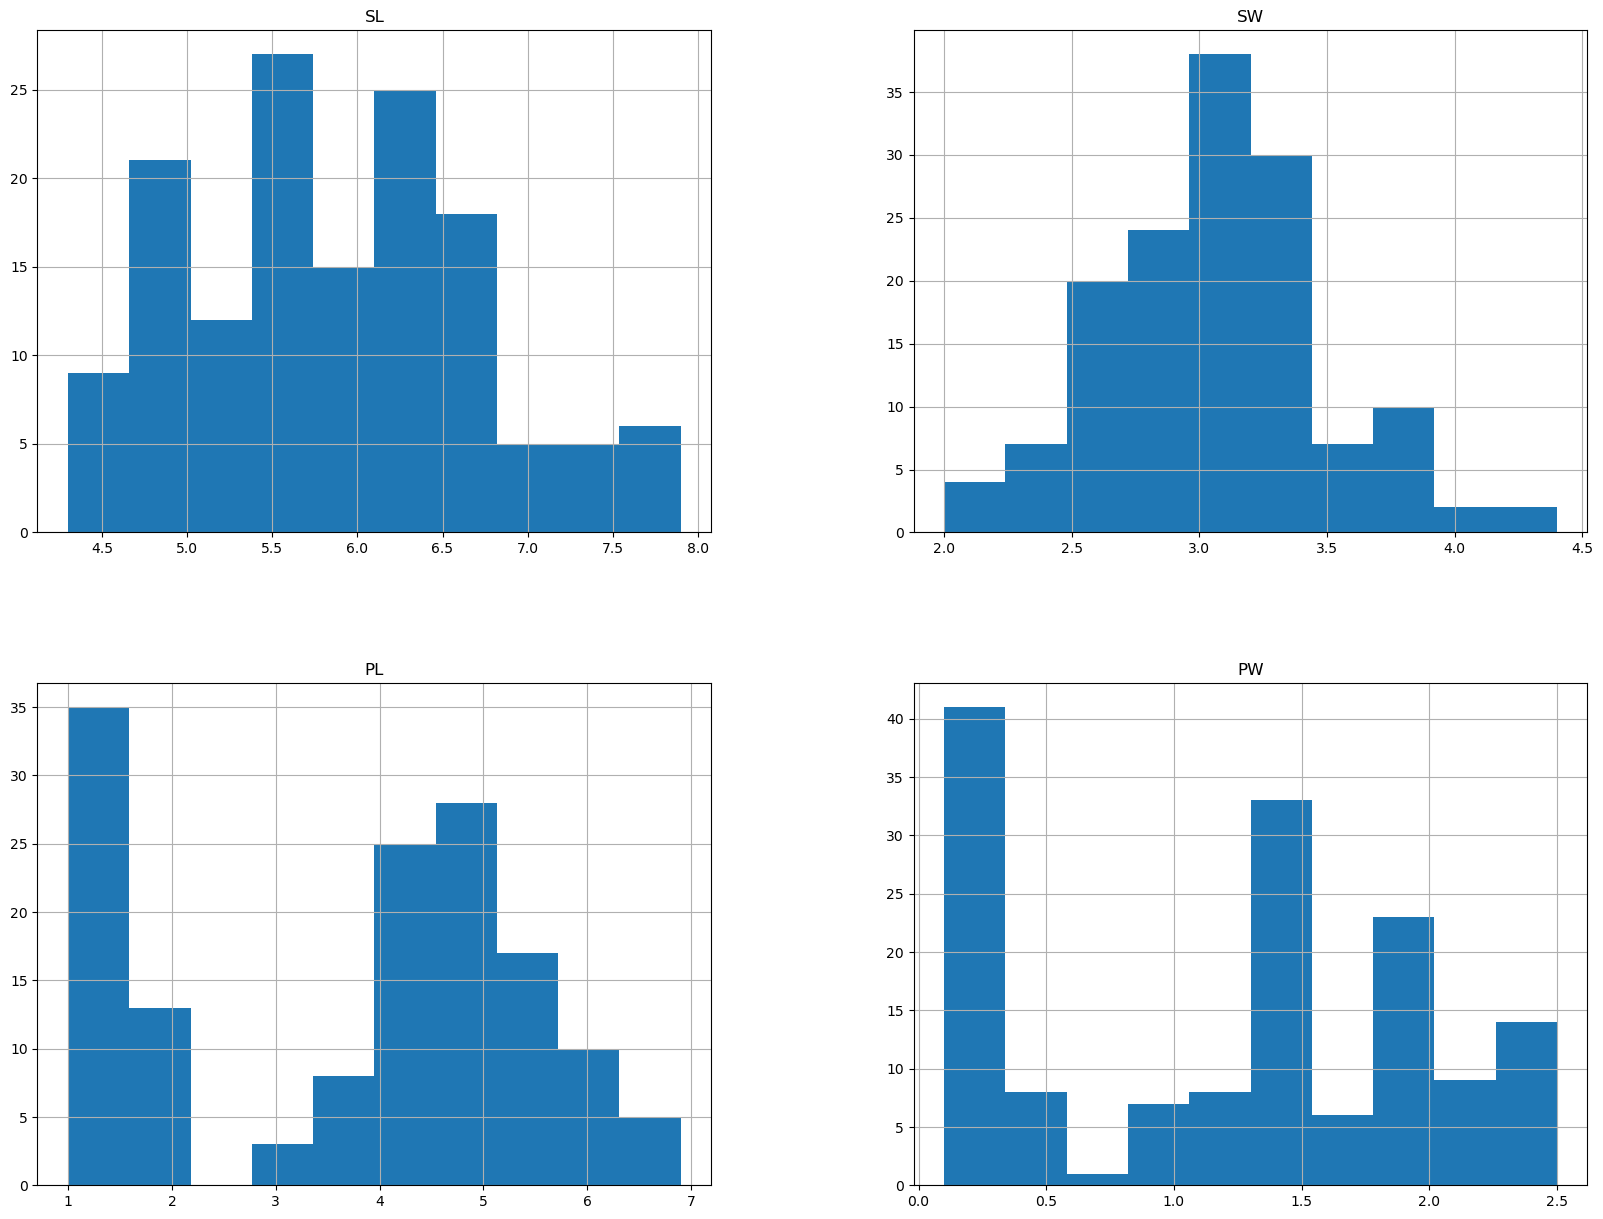

In [6]:
iris.select_dtypes(include=['float']).hist(figsize=(20,15))
plt.show()


Filling null values with median of the respective columns

In [7]:
for i in ['SL','SW','PL']:
    iris[i]=iris[i].fillna(iris[i].median())

In [8]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Checking outliers in the dataset

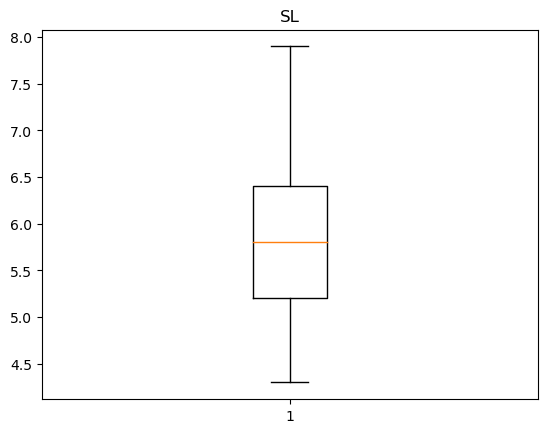

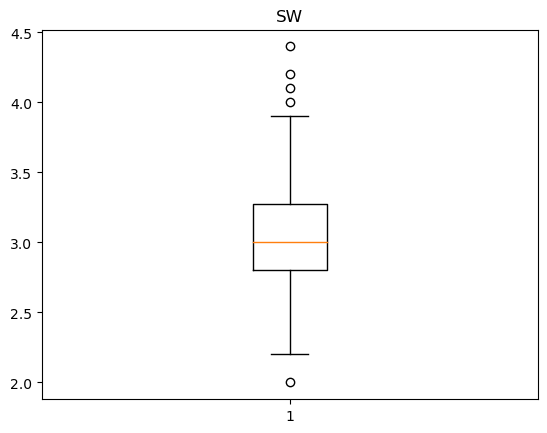

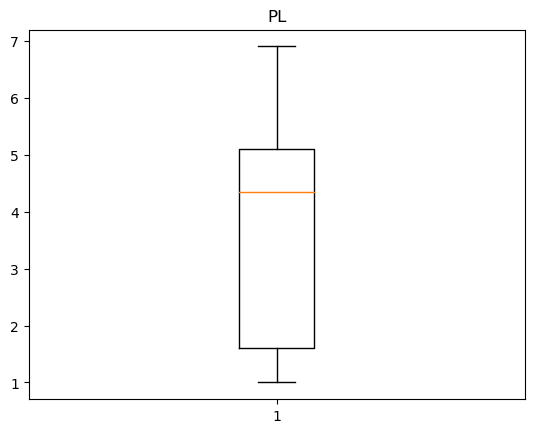

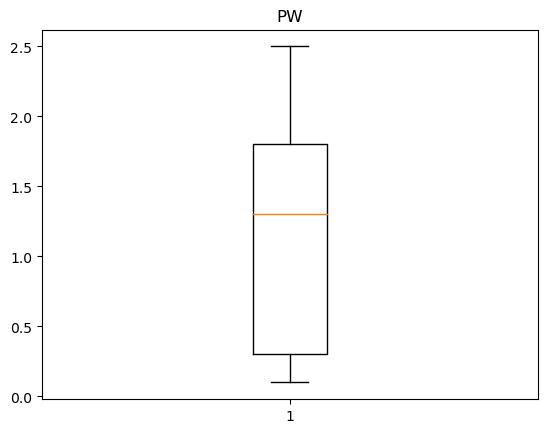

In [9]:
for i in ['SL','SW','PL','PW']:
    plt.boxplot(iris[i])
    plt.title(i)
    plt.show()

There is no big outliers in the dataset. The outliers shown in SW column is useful in prediction.

Seperating features and target for scaling

In [11]:
x=iris.drop('Classification',axis=1)
y=iris['Classification']

Standard scaling

In [12]:
from sklearn.preprocessing import StandardScaler
stscl= StandardScaler()
x=stscl.fit_transform(x)
x=pd.DataFrame(x,columns=['SL', 'SW', 'PL', 'PW'])

In [13]:
x

,SL,SW,PL,PW
0,-0.934811,1.076275,-1.380791,-1.312977
1,-1.182990,-0.112541,-1.380791,-1.312977
2,-0.066181,0.362985,-1.438808,-1.312977
3,-1.555260,0.125222,-1.322775,-1.312977
4,-1.058900,1.314038,-1.380791,-1.312977
...,...,...,...,...
145,1.050628,-0.112541,0.823834,1.447956
146,0.554268,-1.301358,0.707801,0.922064
147,0.802448,-0.112541,0.330694,1.053537
148,0.430178,0.838512,0.939866,1.447956


Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [15]:
iris['Classification']= le.fit_transform(iris['Classification'])

Concatenating DataFrame after scaling and encoding

In [16]:
iris1=pd.concat([x,iris['Classification']],axis=1)

In [17]:
iris1

,SL,SW,PL,PW,Classification
0,-0.934811,1.076275,-1.380791,-1.312977,0
1,-1.182990,-0.112541,-1.380791,-1.312977,0
2,-0.066181,0.362985,-1.438808,-1.312977,0
3,-1.555260,0.125222,-1.322775,-1.312977,0
4,-1.058900,1.314038,-1.380791,-1.312977,0
...,...,...,...,...,...
145,1.050628,-0.112541,0.823834,1.447956,2
146,0.554268,-1.301358,0.707801,0.922064,2
147,0.802448,-0.112541,0.330694,1.053537,2
148,0.430178,0.838512,0.939866,1.447956,2


In [18]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Splitting data for training and testing

In [19]:
x1=iris1.drop('Classification',axis=1)
y1=iris1['Classification']

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2,random_state=42)

# 3. Find out which classification model gives the best result

Fitting to logistic regression model

In [21]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(xtrain,ytrain)
ypred=logr.predict(xtest)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy =', accuracy_score(ytest,ypred))
print('precision_score  =' , precision_score(ytest,ypred,average='macro'))
print('recall_score =',recall_score(ytest,ypred,average='macro'))
print('f1_score ',f1_score(ytest,ypred,average='macro'))

Accuracy = 0.9666666666666667
precision_score  = 0.9722222222222222
recall_score = 0.9629629629629629
f1_score  0.9658994032395567


In [24]:
confusion_matrix(ytest,ypred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Fitting to kNN classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors= np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski', p=2)
    classifier.fit(xtrain,ytrain)
    ypredknn= classifier.predict(xtest)
    acc= accuracy_score(ytest,ypredknn)
    metric.append(acc)

Checking k value with best accuracy

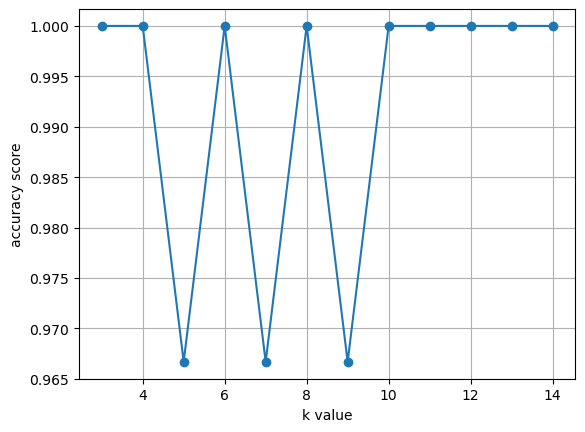

In [27]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric='minkowski', p=2)
classifier.fit(xtrain,ytrain)
ypredknn= classifier.predict(xtest)

In [44]:
print('Accuracy =', accuracy_score(ytest,ypredknn))
print('precision_score  =' , precision_score(ytest,ypredknn,average='macro'))
print('recall_score =',recall_score(ytest,ypredknn,average='macro'))
print('f1_score ',f1_score(ytest,ypredknn,average='macro'))

Accuracy = 1.0
precision_score  = 1.0
recall_score = 1.0
f1_score  1.0


In [46]:
confusion_matrix(ytest,ypredknn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Fitting to SVM classifier

In [30]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear') 
svmclf.fit(xtrain,ytrain)

SVC(kernel='linear')

In [31]:
y_pred=svmclf.predict(xtest)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(ytest,y_pred))

Accuracy is: 0.9666666666666667


In [32]:
print(confusion_matrix(ytest,y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Fitting to Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier()
dtclf.fit(xtrain,ytrain)
ypred=dtclf.predict(xtest)

In [34]:
print('Accuracy is:',accuracy_score(ytest,ypred))

Accuracy is: 1.0


In [35]:
print(confusion_matrix(ytest,ypred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Fitting to Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfclf=RandomForestClassifier()
rfclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [37]:
ypred=rfclf.predict(xtest)

In [38]:
print('Accuracy is:',accuracy_score(ytest,ypred))

Accuracy is: 1.0


In [39]:
print(confusion_matrix(ytest,ypred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


The best classification models are kNN, Decision Tree and Random Forest Classifiers because they have the highest accuracy.